In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2,SelectKBest

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   
5        164        1  ...       1004      1654  1067    17     1         10   
6        139        8  ...        381      1018  3220    13     8         18   
7        187        4  ...        512      1149   700    16     3          5   
8        174        7  ...        386       836  1099    17     1         20   
9         93        5  ...       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0  

[10 rows x 21 columns]

In [4]:
cols=df.columns[0:20]

In [5]:
X=df[cols]

In [6]:
Y=df[[df.columns[-1]]]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Feature Selection Using CHI-SQUARED

In [8]:
features=SelectKBest(score_func=chi2,k=10)

In [9]:
best_features=features.fit(X,Y)

In [10]:
best_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [11]:
dfscores=pd.DataFrame(best_features.scores_,index=X.columns,columns=['Relevance_Score'])

In [12]:
dfscores=dfscores.sort_values(by='Relevance_Score',ascending=False)

In [13]:
dfscores.head(10)

Relevance_Score
ram              931267.519053
px_height         17363.569536
battery_power     14129.866576
px_width           9810.586750
mobile_wt            95.972863
int_memory           89.839124
sc_w                 16.480319
talk_time            13.236400
fc                   10.135166
sc_h                  9.614878

## Feature Selection Using Feature Importance

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [15]:
rfc=RandomForestClassifier()

In [16]:
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
rfc.feature_importances_

array([0.07860998, 0.0063933 , 0.02695179, 0.00686008, 0.02550664,
       0.00611193, 0.03500427, 0.02421973, 0.03992649, 0.02228046,
       0.02879219, 0.05699563, 0.05635664, 0.48106278, 0.02762389,
       0.02885051, 0.02902177, 0.00507666, 0.00740251, 0.00695275])

In [18]:
feature_importance=pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['Importance'])

In [19]:
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
feature_importance.head(10)

Importance
ram              0.481063
battery_power    0.078610
px_height        0.056996
px_width         0.056357
mobile_wt        0.039926
int_memory       0.035004
talk_time        0.029022
sc_w             0.028851
pc               0.028792
sc_h             0.027624

In [20]:
import seaborn as sns

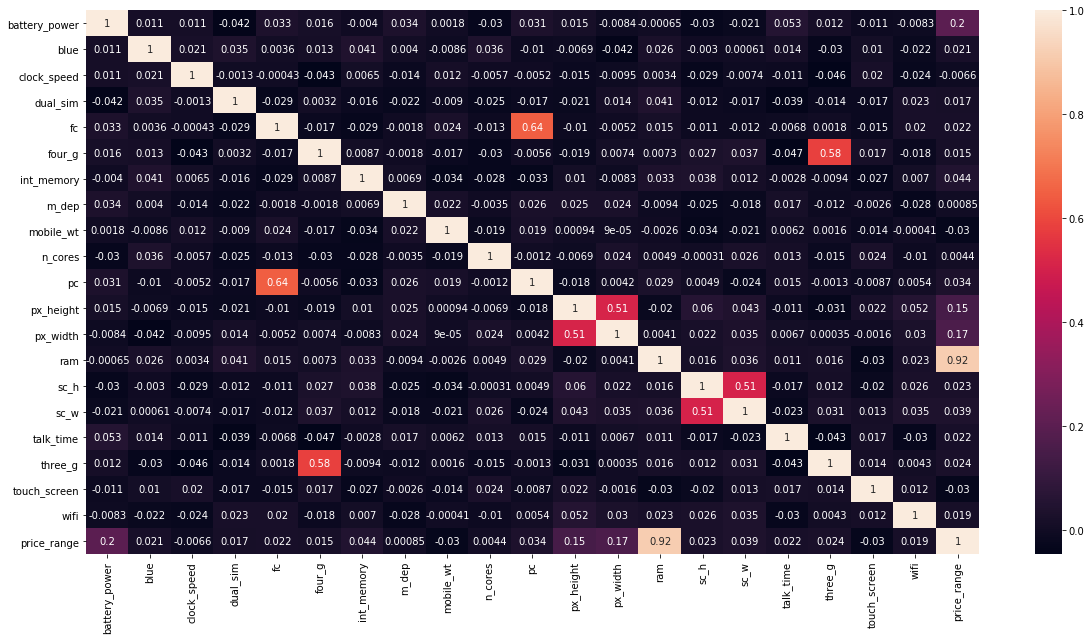

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
df_corr_with_price=df.corr()[['price_range']][:-1]

In [23]:
df_corr_with_price=df_corr_with_price.sort_values(by='price_range',ascending=False)

In [24]:
df_corr_with_price.head(10)

price_range
ram               0.917046
battery_power     0.200723
px_width          0.165818
px_height         0.148858
int_memory        0.044435
sc_w              0.038711
pc                0.033599
three_g           0.023611
sc_h              0.022986
fc                0.021998

In [25]:
X_new=X[['ram','battery_power','px_width','px_height','mobile_wt','int_memory','sc_w','talk_time','sc_h','fc','pc']]

In [26]:
X_new

ram  battery_power  px_width  px_height  mobile_wt  int_memory  sc_w  \
0     2549            842       756         20        188           7     7   
1     2631           1021      1988        905        136          53     3   
2     2603            563      1716       1263        145          41     2   
3     2769            615      1786       1216        131          10     8   
4     1411           1821      1212       1208        141          44     2   
...    ...            ...       ...        ...        ...         ...   ...   
1995   668            794      1890       1222        106           2     4   
1996  2032           1965      1965        915        187          39    10   
1997  3057           1911      1632        868        108          36     1   
1998   869           1512       670        336        145          46    10   
1999  3919            510       754        483        168          45     4   

      talk_time  sc_h  fc  pc  
0            19     9   1   2  
1             7    17   0   6  
2             9    11   2   6  
3            11    16   0   9  
4            15     8  13  14  
...         ...   ...  ..  ..  
1995         19    13   0  14  
1996         16    11   0   3  
1997          5     9   1   3  
1998         19    18   4   5  
1999          2    19   5  16  

[2000 rows x 11 columns]

In [27]:
new_cols=X_new.columns

In [28]:
from sklearn.model_selection import cross_val_score

## Using logistic regression Accuracy Calculation

In [29]:
calc_scores=cross_val_score(rfc,X,Y,cv=11)
calc_scores.mean()

0.8799736175426783

In [30]:
calc_scores_new=cross_val_score(rfc,X_new,Y,cv=11)
calc_scores_new.mean()

0.9009719562205749

In [31]:
u=X.mean(axis=0)
std=X.std(axis=0)
X=(X-u)/std
X=X.values
Y=Y.values

In [32]:
logical=LogisticRegression()
logical.fit(X,Y)
logical.score(X,Y)

0.9785

In [33]:
u_new=X_new.mean(axis=0)
std_new=X_new.std(axis=0)
X_new=(X_new-u_new)/std_new
X_new=X_new.values

In [34]:
logical.fit(X_new,Y)
logical.score(X_new,Y)

0.979

## Using Random Forest for Accuracy Calculation

In [35]:
rfc_scores=cross_val_score(rfc,X,Y,cv=11)
rfc_scores.mean()

0.8794879153995177

In [36]:
rfc_scores_new=cross_val_score(rfc,X_new,Y,cv=11)
rfc_scores_new.mean()

0.9034832570744172

## Making Predictions

In [44]:
test_df=pd.read_csv('test.csv')

In [38]:
test_df=test_df[new_cols]
test_df=(test_df-u_new)/std_new

In [39]:
test_vals=test_df.values

In [40]:
predictions=logical.predict(test_vals)

In [41]:
predict_df=pd.DataFrame(predictions)

In [42]:
predict_df.columns=['price_range']

In [43]:
predict_df

price_range
0              3
1              3
2              2
3              3
4              1
..           ...
995            2
996            1
997            0
998            2
999            2

[1000 rows x 1 columns]